## Data analysis and Visualization 

Here, we used the utilities functions to perform analysis on the downscaled future projections (seasonal climatologies, future trends, etc)

In [4]:
import os 
import sys
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd 
import numpy as np 
import seaborn as sns
from pyESD.ESD_utils import load_all_stations, load_pickle, load_csv
from pyESD.plot import *
from pyESD.plot_utils import *
from read_data import station_prec_datadir, stationnames_prec

In [12]:
fullCMIP5 = pd.date_range(start='2010-01-01', end='2100-12-31', freq='MS')
from2040to2070 = pd.date_range(start='2040-01-01', end='2070-12-31', freq='MS')
from2070to2100 = pd.date_range(start='2070-01-01', end='2100-12-31', freq='MS')
# date-range for model training and validation
from1958to2010 = pd.date_range(start="1958-01-01", end="2010-12-31", freq="MS")

In [13]:
path_to_results = "C:/Users/dboateng/Desktop/Python_scripts/ESD_Package/examples/tutorials/final_model/"

## CV metrics 
The stacking model didn't perform better than the previous one since we changed the meta-learner to Extra-Tree, LassoLarsCV would have been better

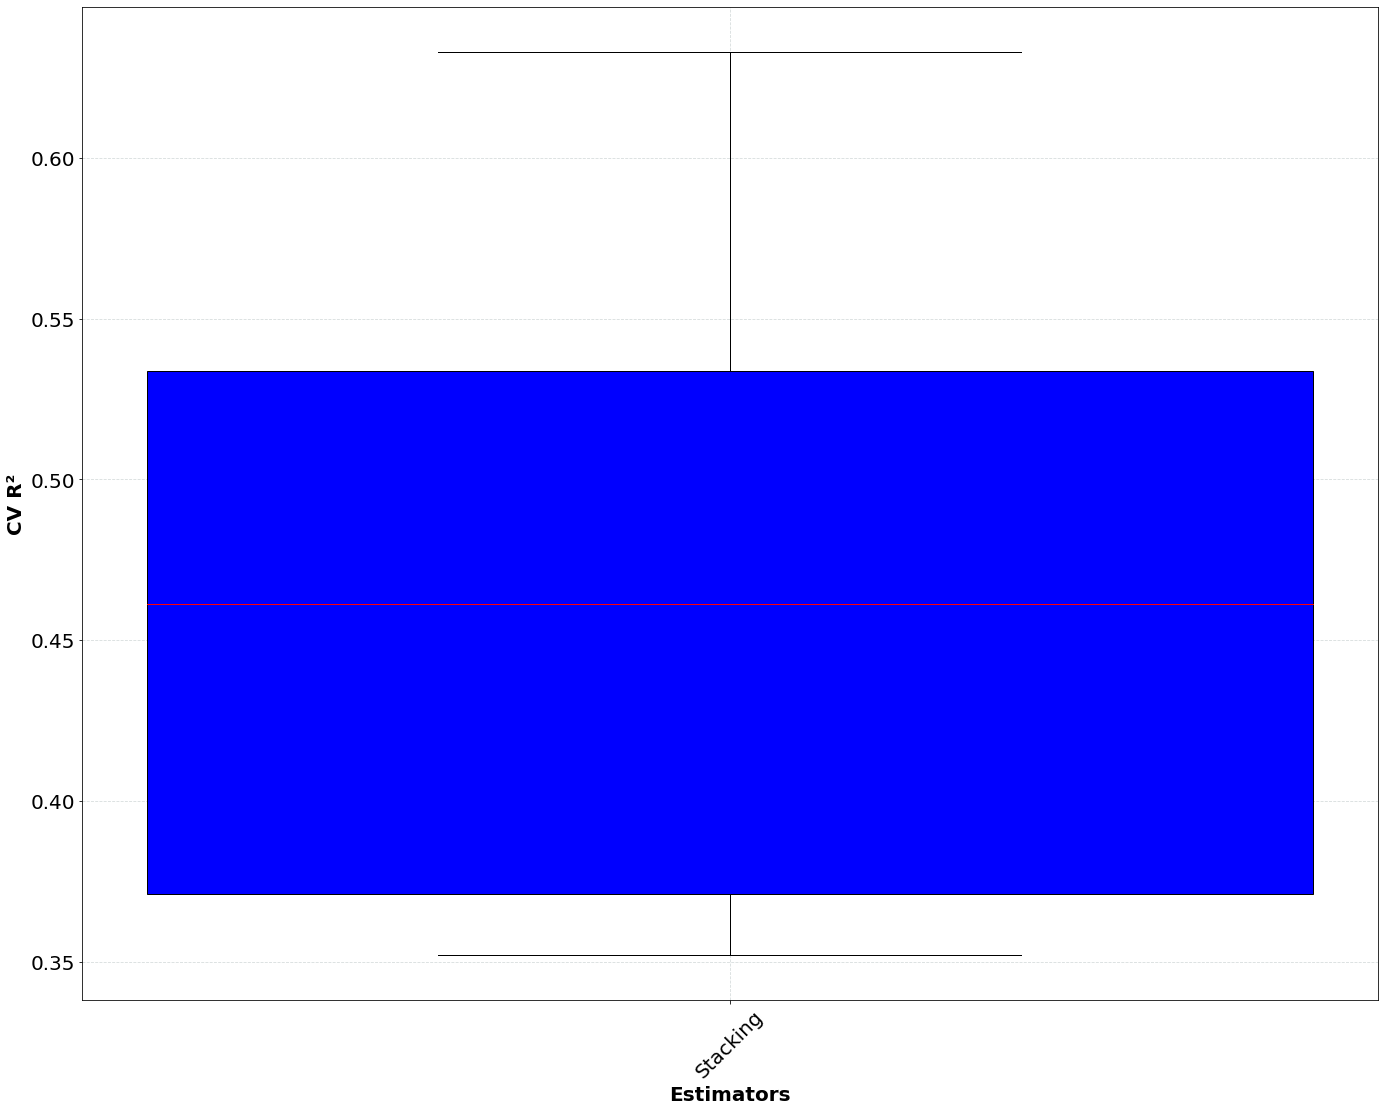

In [14]:
colors = [blue]
estimators=["Stacking"]
boxplot(estimators, stationnames_prec, path_to_results,  
                varname="test_r2", filename="validation_score_", xlabel="Estimators",
                ylabel="CV R²", colors = colors, patch_artist=(True))

# Prediction example and its comparison with observed

extracting information for the station:  Mannheim
extracting information for the station:  Mannheim


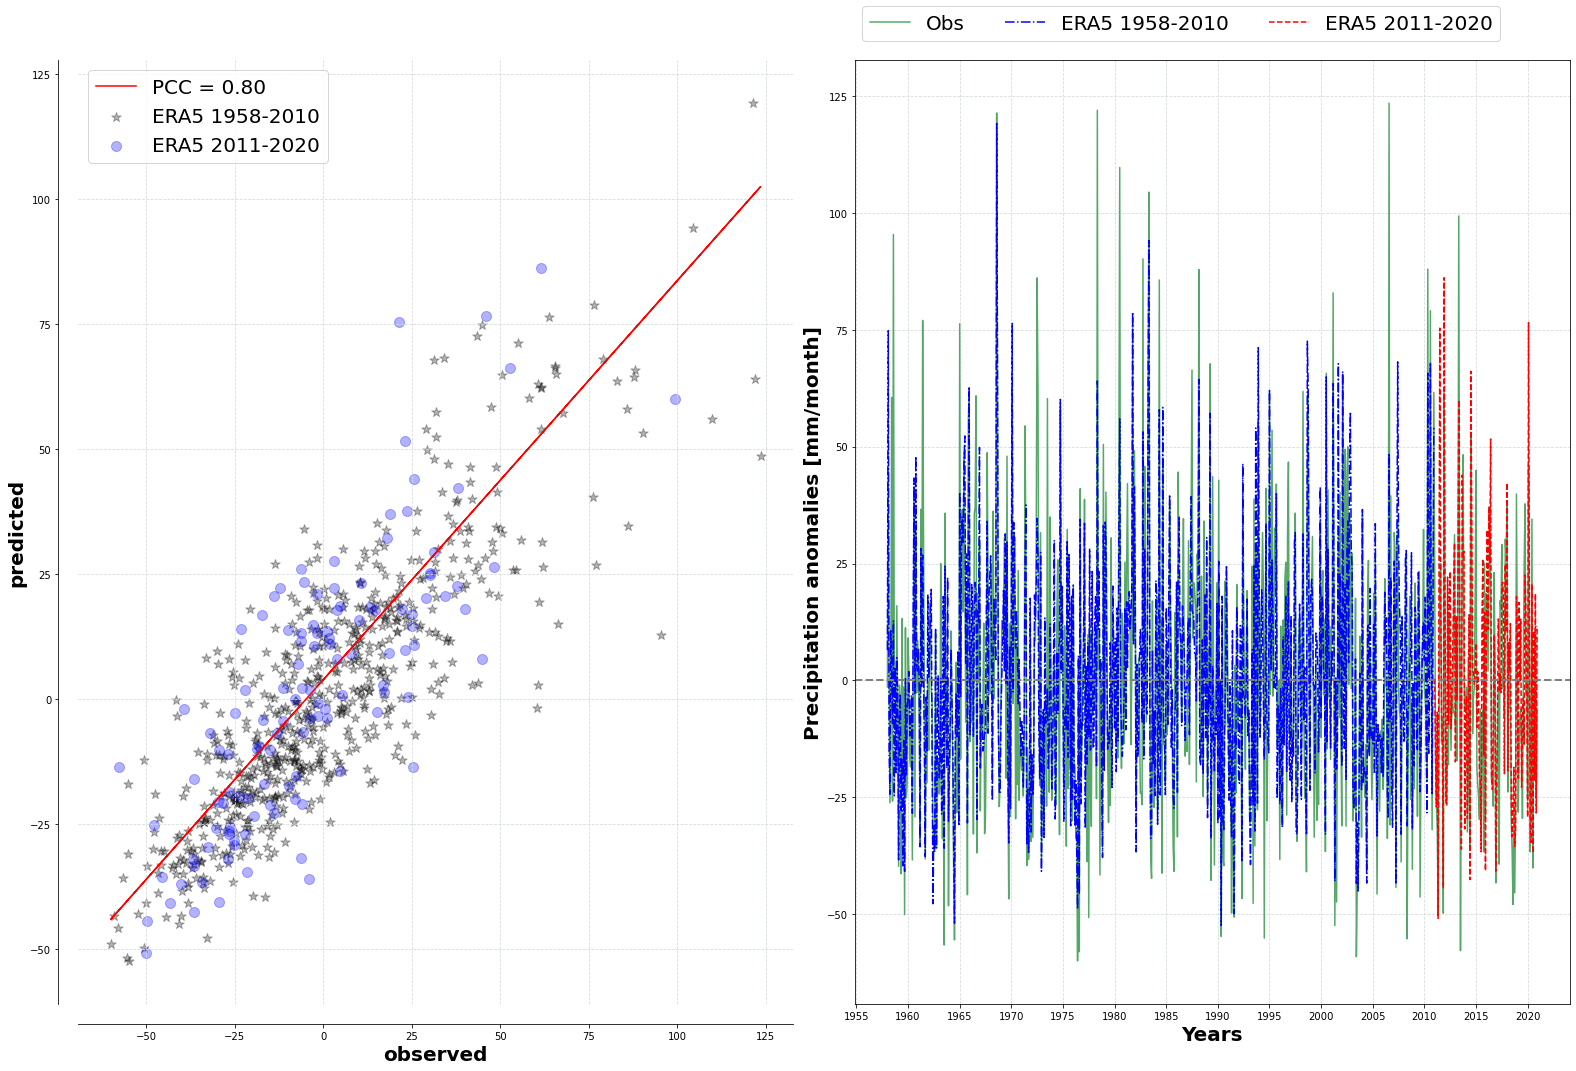

In [15]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22,15), sharex=False)
scatterplot(station_num=2, stationnames=stationnames_prec, path_to_data=path_to_results, 
                filename="predictions_", ax=ax1, xlabel="observed", ylabel="predicted",
                method= "Stacking",)
    
lineplot(station_num=2, stationnames=stationnames_prec, path_to_data=path_to_results, 
            filename="predictions_", ax=ax2, fig=fig, ylabel="Precipitation anomalies [mm/month]",
            xlabel= "Years", method= "Stacking",)

## Plotting the long-term seasonal climatologies

In [16]:
#obs
df_prec_sm = seasonal_mean(stationnames_prec, path_to_results, filename="predictions_", 
                        daterange=from1958to2010 , id_name="obs", method= "Stacking",
                        use_id=False)


df_prec_85_from2040to2070 = seasonal_mean(stationnames_prec, path_to_results, filename="predictions_", 
                        daterange=from2040to2070 , id_name="CMIP5 RCP8.5 anomalies", method= "Stacking",
                        use_id=False)

df_prec_85_from2070to2100 = seasonal_mean(stationnames_prec, path_to_results, filename="predictions_", 
                        daterange=from2070to2100 , id_name="CMIP5 RCP8.5 anomalies", method= "Stacking",
                        use_id=False)

## Mid-century

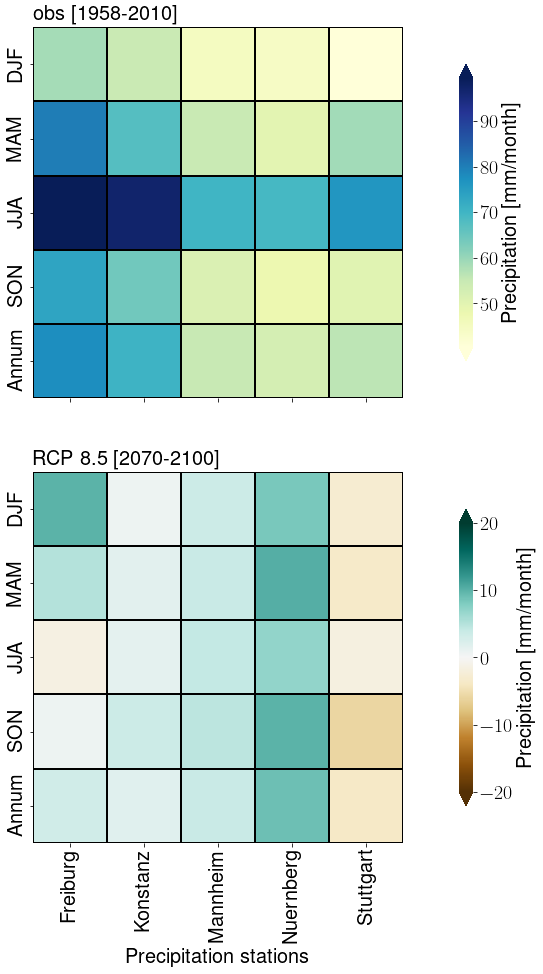

In [17]:
apply_style(fontsize=20, style=None, linewidth=2)

fig, (ax1, ax2,) = plt.subplots(nrows=2, ncols=1, figsize=(20,15), sharex=False)
#cbar_ax = fig.add_axes([0.90, 0.35, 0.02, 0.25])

# end of century

heatmaps(data=df_prec_sm, cmap="YlGnBu", label="Precipitation [mm/month]", title= "obs [1958-2010]", 
         ax=ax1, cbar=True, )

heatmaps(data=df_prec_85_from2070to2100, cmap=BrBG, label="Precipitation [mm/month]", title= "RCP 8.5 [2070-2100]", 
         ax=ax2, cbar=True, vmax=20, vmin=-20, center=0, xlabel="Precipitation stations")


## End of century

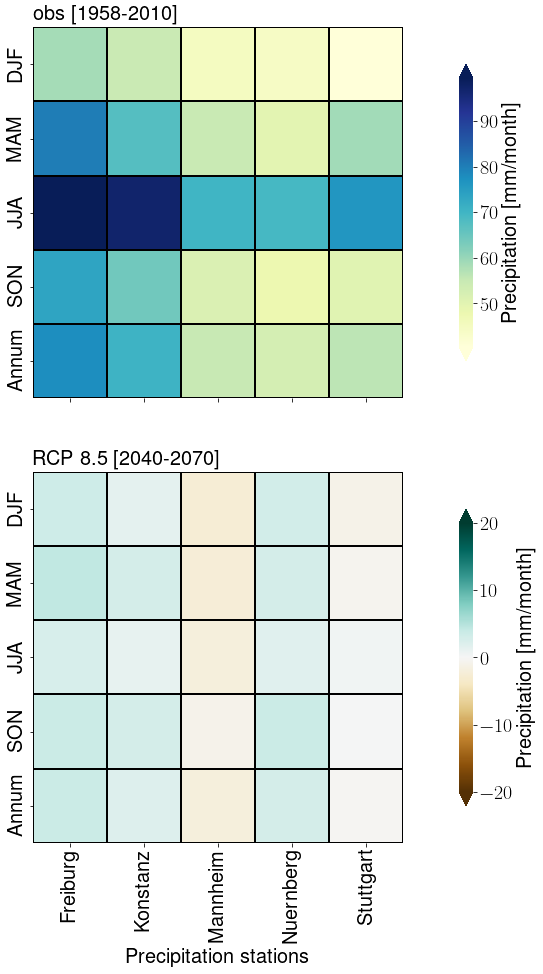

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,15), sharex=False)
#cbar_ax = fig.add_axes([0.90, 0.35, 0.02, 0.25])

# mid of century

heatmaps(data=df_prec_sm, cmap="YlGnBu", label="Precipitation [mm/month]", title= "obs [1958-2010]", 
         ax=ax1, cbar=True, )

heatmaps(data=df_prec_85_from2040to2070, cmap=BrBG, label="Precipitation [mm/month]", title= "RCP 8.5 [2040-2070]", 
         ax=ax2, cbar=True, vmax=20, vmin=-20, center=0, xlabel="Precipitation stations")

## Time series plot of the ensemble means of all the stations 

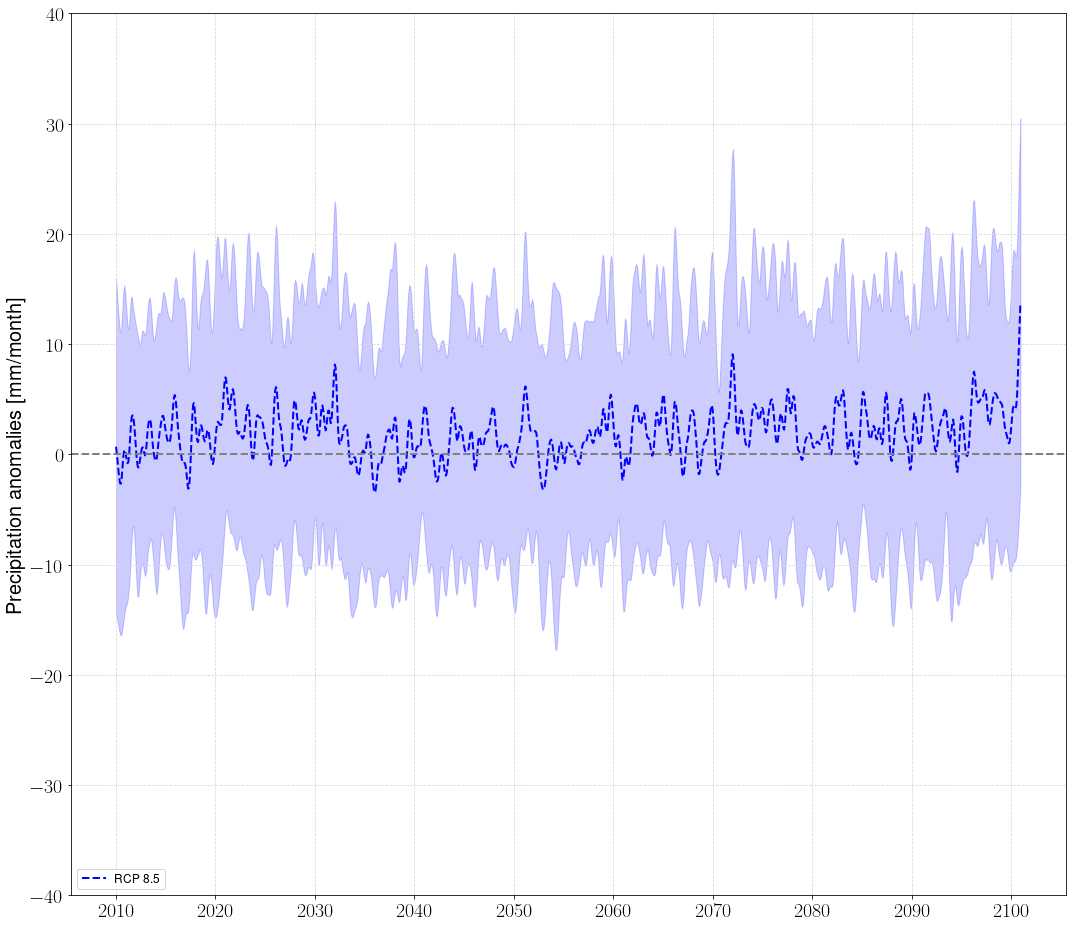

In [20]:
# extracting time series for all stations 
apply_style(fontsize=20, style=None, linewidth=2)
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15,13),
                                   sharex=True, sharey=True)
plt.subplots_adjust(left=0.02, right=0.90, top=0.94, bottom=0.05,hspace=0.01)

plot_time_series(stationnames_prec, path_to_results, filename="predictions_", 
                 id_name="CMIP5 RCP8.5 anomalies", daterange=fullCMIP5,
                 color=blue, label="RCP 8.5", ymax=40, ymin=-40,
                 ylabel= "Precipitation anomalies [mm/month]", ax=ax1, 
                 window=12)